In [ ]:
import torch
import matplotlib.pyplot as plt

from utils import load_data, normalise

ROOT_DIR = '.'
DATA_DIR = f"{ROOT_DIR}/data"

tasks = ['atis', 'snips', 'clinic150', 'massive']

### Looking at label similarity distribution

/tmp/ipykernel_3064030/1986074601.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  desc_sims = torch.load(f"/home/roy/workspace/semantic-sim-intent/output/{task}-{encoder

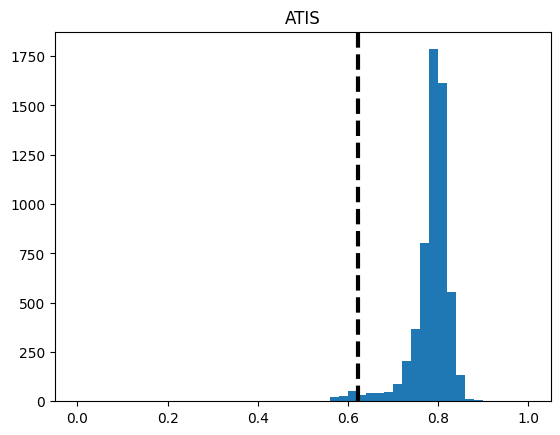

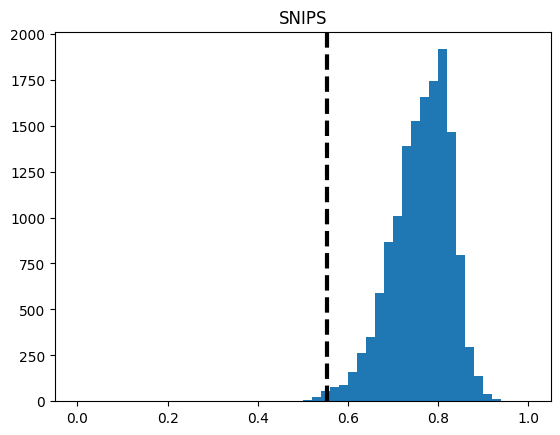

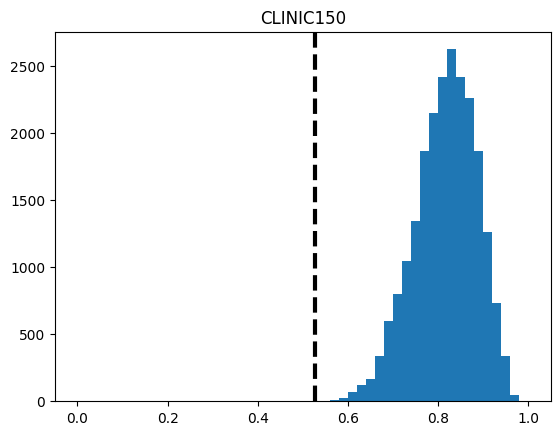

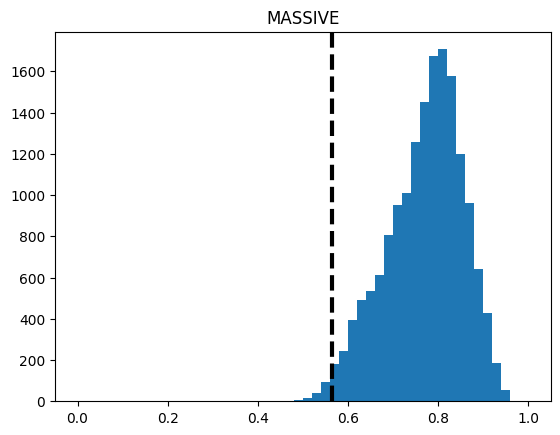

In [ ]:
encoder_model = 'bge-large-en-v1.5'
# encoder_model = 'gte-large'
setup = 'e+p+om'

task_intra_desc_sims = {}

for task in tasks:
    labels, _, _, _, intents = load_data(task, 'gemma-2-9b-it', 'gemma-2-9b-it', '8_bit_quant')
    desc_sims = torch.load(f"{task}-{encoder_model}-descriptions-desc-embeds.pt")
    sims = torch.load(f"{ROOT_DIR}/sims/{task}-{encoder_model}-sims-{setup}.pt", weights_only=True)
    label_sim = torch.gather(sims, index=labels.unsqueeze(-1), dim=1).flatten()
    plt.title(task.upper())
    plt.hist(label_sim, bins=torch.arange(0, 1.02, step=0.02))

    intra_desc_sim = normalise(desc_sims) @ normalise(desc_sims).T
    intra_desc_sim = torch.triu(intra_desc_sim, diagonal=1).flatten()
    intra_desc_sim = intra_desc_sim[intra_desc_sim.nonzero().flatten()]

    mu = intra_desc_sim.mean()
    sigma = intra_desc_sim.std()
    cov = sigma / mu

    threshold = mu - cov

    task_intra_desc_sims[task] = threshold
    plt.axvline(threshold, c='black', linestyle='--', linewidth=3)
    plt.show()


### Check average top-k when using mean intraclass sim

In [ ]:
for task in tasks:
    labels, _, _, _, intents = load_data(task, 'gemma-2-9b-it', 'gemma-2-9b-it', '8_bit_quant')
    desc_sims = torch.load(f"{task}-{encoder_model}-descriptions-desc-embeds.pt")
    sims = torch.load(f"{ROOT_DIR}/sims/{task}-{encoder_model}-sims-{setup}.pt", weights_only=True)
    label_sim = torch.gather(sims, index=labels.unsqueeze(-1), dim=1).flatten()

    above_threshold = (sims >= task_intra_desc_sims[task]).sum(dim=1).float()
    # plt.hist(above_threshold, bins=torch.arange(0, len(intents), step=2))
    # plt.title(task.upper())
    # plt.show()
    print(f"{task} {encoder_model} mean top-k: {above_threshold.mean()}")


atis bge-large-en-v1.5 mean top-k: 12.452033996582031
snips bge-large-en-v1.5 mean top-k: 5.390016555786133
clinic150 bge-large-en-v1.5 mean top-k: 129.89671325683594
massive bge-large-en-v1.5 mean top-k: 44.32298278808594


/tmp/ipykernel_3064030/2040685622.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  desc_sims = torch.load(f"/home/roy/workspace/semantic-sim-intent/output/{task}-{encoder

### Check intra-class sim distribution

/tmp/ipykernel_3064030/2101952693.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  desc_sims = torch.load(f"/home/roy/workspace/semantic-sim-intent/output/{task}-{encoder

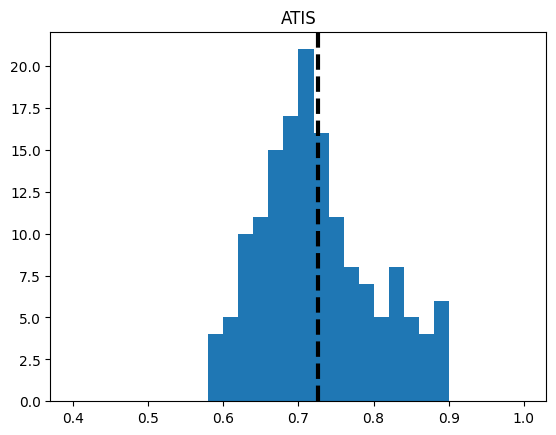

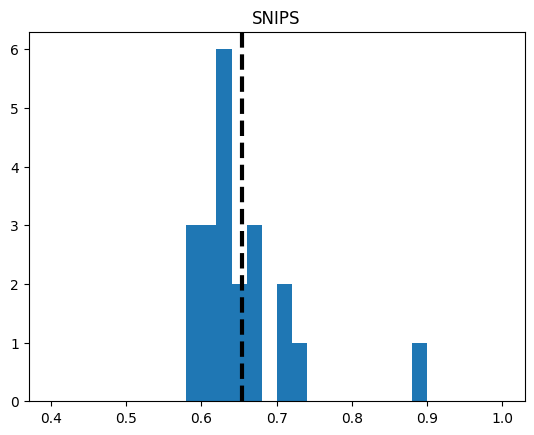

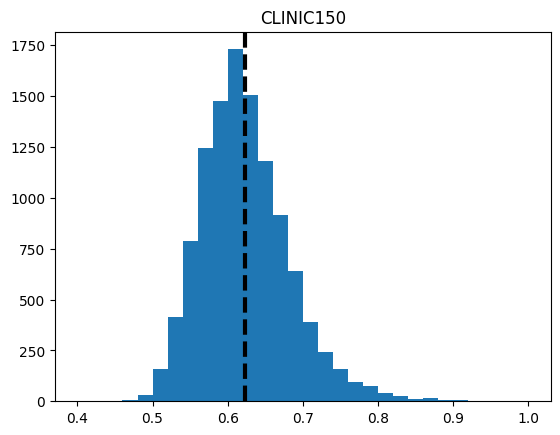

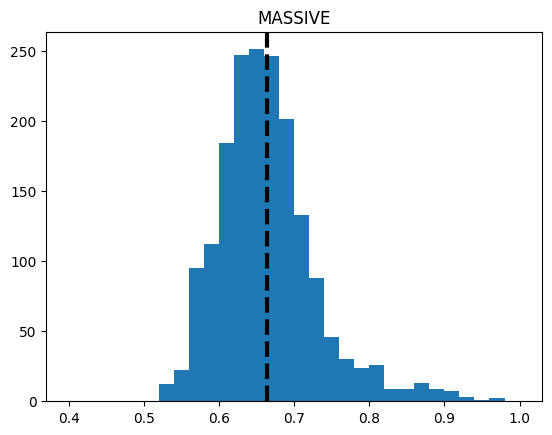

In [ ]:
for task in tasks:
    labels, _, _, _, intents = load_data(task, 'gemma-2-9b-it', 'gemma-2-9b-it', '8_bit_quant')
    desc_sims = torch.load(f"{task}-{encoder_model}-descriptions-desc-embeds.pt")
    sims = torch.load(f"{ROOT_DIR}/sims/{task}-{encoder_model}-sims-{setup}.pt", weights_only=True)
    label_sim = torch.gather(sims, index=labels.unsqueeze(-1), dim=1).flatten()

    intra_desc_sim = normalise(desc_sims) @ normalise(desc_sims).T
    intra_desc_sim = torch.triu(intra_desc_sim, diagonal=1).flatten()
    intra_desc_sim = intra_desc_sim[intra_desc_sim.nonzero().flatten()]

    plt.hist(intra_desc_sim, bins=torch.arange(0.4, 1.02, step=0.02))
    plt.axvline(intra_desc_sim.mean(), c='black', linestyle='--', linewidth=3)
    plt.title(task.upper())
    plt.show()

### Dynamic Thresholding using mean and stdev

ATIS tensor(0.7257) tensor(0.0757) tensor(0.1043)


/tmp/ipykernel_3064030/964120194.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  desc_sims = torch.load(f"/home/roy/workspace/semantic-sim-intent/output/{task}-{encoder_

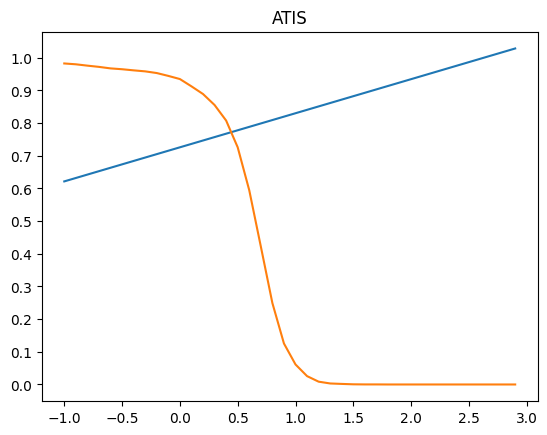

SNIPS tensor(0.6540) tensor(0.0654) tensor(0.0999)


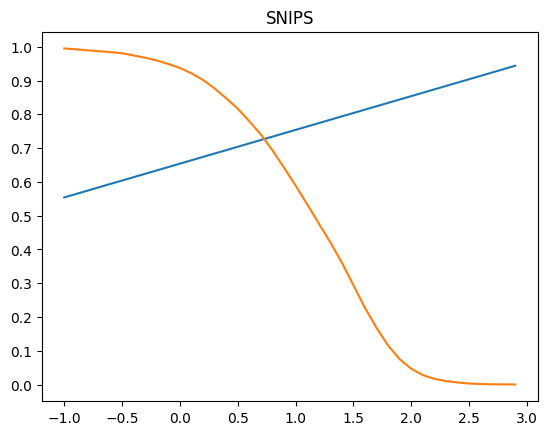

CLINIC150 tensor(0.6231) tensor(0.0594) tensor(0.0953)


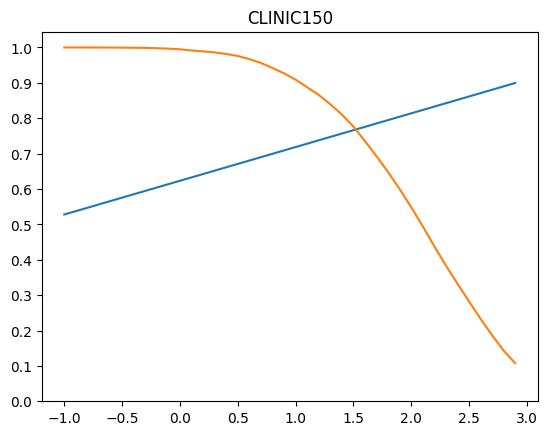

MASSIVE tensor(0.6643) tensor(0.0657) tensor(0.0990)


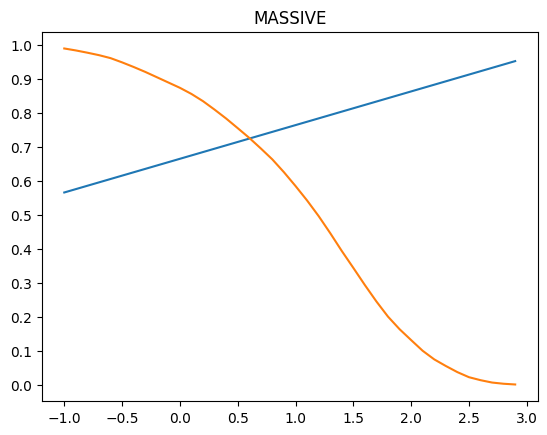

In [ ]:
for task in tasks:
    labels, _, _, _, intents = load_data(task, 'gemma-2-9b-it', 'gemma-2-9b-it', '8_bit_quant')
    desc_sims = torch.load(f"{task}-{encoder_model}-descriptions-desc-embeds.pt")
    sims = torch.load(f"{ROOT_DIR}/sims/{task}-{encoder_model}-sims-{setup}.pt", weights_only=True)
    label_sim = torch.gather(sims, index=labels.unsqueeze(-1), dim=1).flatten()

    intra_desc_sim = normalise(desc_sims) @ normalise(desc_sims).T
    intra_desc_sim = torch.triu(intra_desc_sim, diagonal=1).flatten()
    intra_desc_sim = intra_desc_sim[intra_desc_sim.nonzero().flatten()]

    alphas = torch.arange(-1.0, 3.0, step=0.1)
    mu = intra_desc_sim.mean()
    sigma = intra_desc_sim.std()
    cov = sigma / mu
    print(task.upper(), mu, sigma, cov)
    thresholds = mu + alphas * sigma / mu
    p_geq_threshold = [(label_sim > t).int().float().mean() for t in thresholds]

    plt.plot(alphas, thresholds)
    plt.plot(alphas, p_geq_threshold)
    plt.title(task.upper())
    plt.yticks(torch.arange(0, 1.1, step=0.1))
    plt.show()

    # plt.hist(intra_desc_sim, bins=torch.arange(0.4, 1.02, step=0.02))
    # plt.axvline(intra_desc_sim.mean(), c='black', linestyle='--', linewidth=3)
    # plt.title(task.upper())
    # plt.show()

### Investigate using gradient of utterance-description similarities (ranked) to find turning point for top-k

ATIS tensor(0.9737) tensor(8.0426) tensor(0.6356)
(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), tensor([4054, 1294,  189,   63,   34,   22,   40,   25,   20,    9,   15,   14,
          24,   11,    3,   10]))
(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), tensor([ 939,  456,   28,    6,   20,  247, 1211,   68,   87,   70,   89,  411,
          52,   86, 2057]))


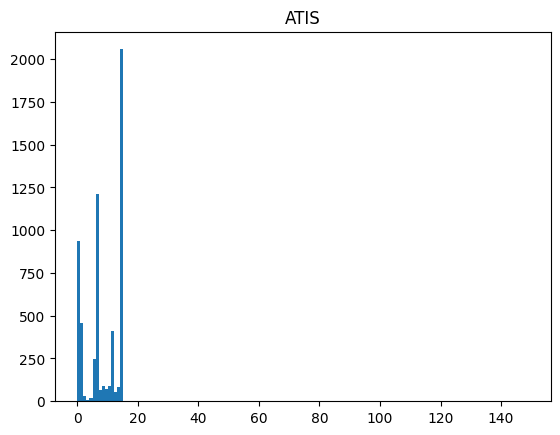

SNIPS tensor(0.9786) tensor(0.4472) tensor(0.6311)
(tensor([0, 1, 2, 3, 4, 5, 6]), tensor([13443,   480,   305,   139,    65,    33,    19]))
(tensor([0, 1, 2, 3, 4, 5]), tensor([10922,  1780,  1128,   300,   229,   125]))


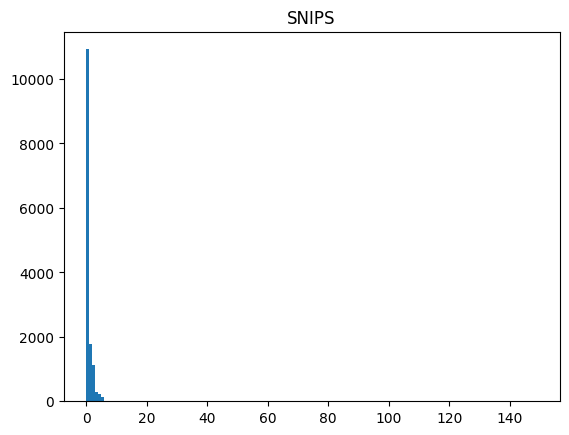

CLINIC150 tensor(0.9493) tensor(4.0445) tensor(0.7301)
(tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  31,  33,  34,  35,  36,  37,  38,  39,  40,  42,  43,  44,
         45,  46,  47,  48,  53,  57,  59,  61,  64,  66,  73,  76,  77,  79,
         84,  89,  91, 106, 112, 146]), tensor([18439,  2100,   733,   341,   207,   109,    84,    70,    51,    41,
           36,    29,    32,    27,    29,    20,    10,    14,    10,    15,
            8,     6,     9,     5,     8,     3,     4,     3,     1,     2,
            1,     2,     4,     4,     1,     1,     1,     2,     3,     3,
            2,     1,     3,     3,     2,     3,     2,     1,     1,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1]))
(tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16

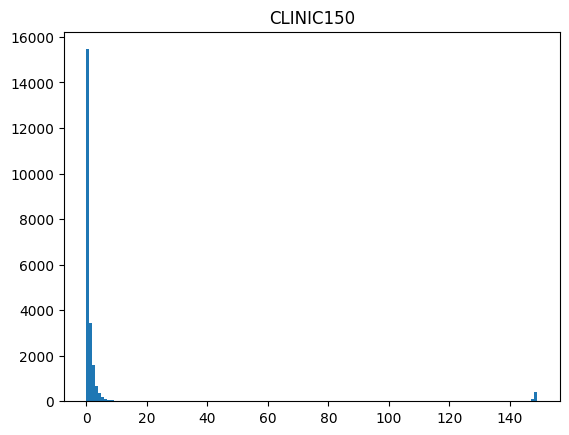

MASSIVE tensor(0.8848) tensor(3.6243) tensor(0.6964)
(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54,
        55, 57, 59]), tensor([10827,  2164,  1025,   651,   353,   241,   168,   145,    95,    75,
           59,    74,    57,    48,    49,    35,    38,    28,    38,    26,
           26,    29,    20,    24,    16,    15,    13,    10,    10,     8,
           13,    11,    13,    10,     8,    11,     6,     6,     3,     5,
            5,     5,     3,     8,    10,     2,     7,     2,     4,     4,
            3,     3,     3,     2,     1,     2,     4]))
(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        20, 21, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]), tensor([8521, 3260, 

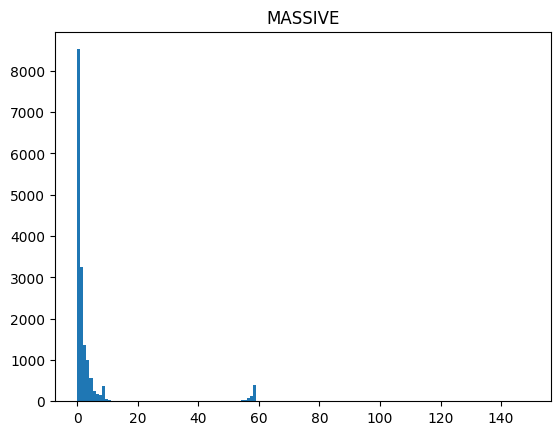

In [ ]:
for task in tasks:
    labels, _, _, _, intents = load_data(task, 'gemma-2-9b-it', 'gemma-2-9b-it', '8_bit_quant')
    desc_embeds = torch.load(f"{task}-{encoder_model}-descriptions-desc-embeds.pt", weights_only=True)
    desc_sims = normalise(desc_embeds) @ normalise(desc_embeds).T
    sims = torch.load(f"{ROOT_DIR}/sims/{task}-{encoder_model}-sims-{setup}.pt", weights_only=True)
    label_sim = torch.gather(sims, index=labels.unsqueeze(-1), dim=1).flatten()

    sims_sorted, sims_sorted_indices = torch.sort(sims, descending=True, dim=1)
    intent_pos = torch.argsort(sims_sorted_indices)
    labels_pos = torch.gather(intent_pos, index=labels.unsqueeze(-1), dim=1).flatten()

    if task == 'atis':
        delta_sims = sims_sorted[:, :-3] - sims_sorted[:, 1:-2]
    else:
        delta_sims = sims_sorted[:, :-1] - sims_sorted[:, 1:]

    cutoff_index = torch.argmax(delta_sims, dim=1)
    thresholds = torch.gather(sims_sorted, index=cutoff_index.unsqueeze(-1) + 1, dim=1).flatten()
    print(task.upper(), (label_sim >= thresholds).float().mean(), cutoff_index.float().mean(), thresholds.mean())
    print(torch.unique(labels_pos, return_counts=True))
    print(torch.unique(cutoff_index, return_counts=True))

    plt.title(task.upper())
    plt.hist(cutoff_index, bins=torch.arange(0, 150, step=1))

    # plt.axvline(threshold, c='black', linestyle='--', linewidth=3)
    plt.show()

### Modulate similarity distribution with intra-description similarity

ATIS success rate tensor(0.9586) mean label pos tensor(1.7546)
mean k tensor(5.1979)
(tensor([ 5, 19, 20]), tensor([5750,    2,   75]))


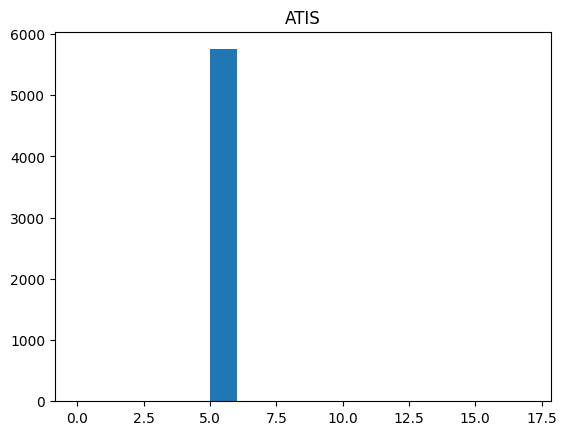

SNIPS success rate tensor(0.9977) mean label pos tensor(0.3665)
mean k tensor(5.8864)
(tensor([5, 6, 7, 8, 9]), tensor([6115, 5769, 1294,  742,  564]))


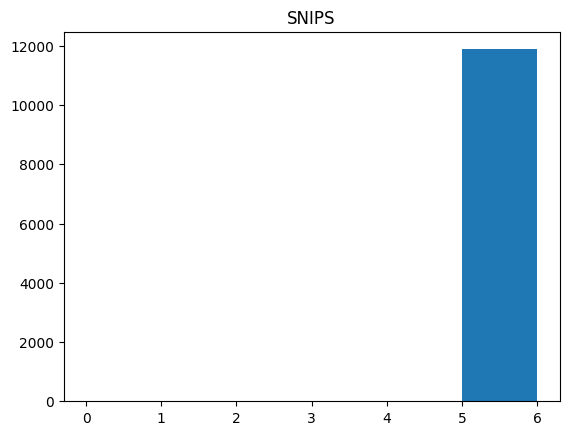

CLINIC150 success rate tensor(0.9623) mean label pos tensor(1.2485)
mean k tensor(7.1542)
(tensor([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  31,  32,  33,  34,
         35,  36, 137, 138, 139, 141, 142, 143, 144, 146, 147, 148, 149, 150,
        151, 152]), tensor([10038,  6404,  2883,  1248,   684,   344,   235,   159,   108,    78,
           51,    32,    20,    16,    11,     6,     3,     5,     3,     3,
            7,     2,     2,     1,     1,     1,     1,     1,     2,     1,
            1,     1,     1,     2,     2,     3,     4,     2,     3,     6,
           13,    14,    27,    71]))


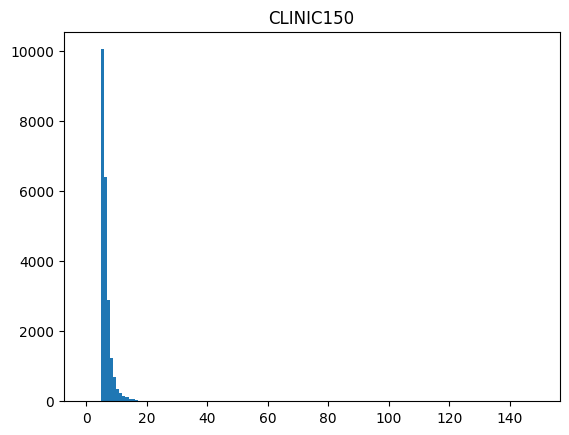

MASSIVE success rate tensor(0.9059) mean label pos tensor(2.6345)
mean k tensor(7.6975)
(tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 38, 39, 40, 41, 42, 43,
        45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]), tensor([5835, 5093, 2834, 1099,  491,  238,  160,  101,   67,   38,   29,   22,
          16,   17,    7,   14,    6,    3,    6,   10,    3,    1,    1,    1,
           1,    1,    3,    3,    2,    2,    1,    1,    3,    1,    2,    2,
           1,    5,    3,    3,    3,    2,    7,    4,    5,    7,    7,   15,
          18,   35,   46,   85,  161]))


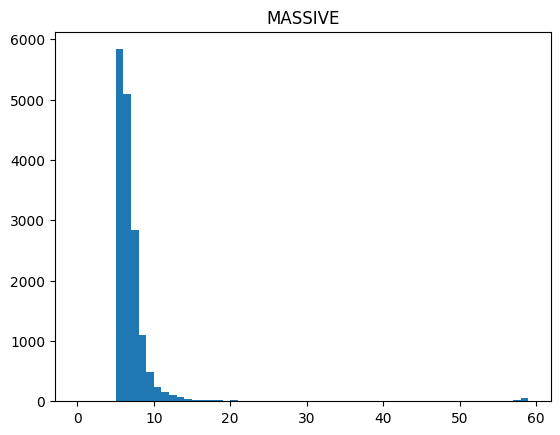

In [ ]:
import torch
import matplotlib.pyplot as plt
from utils import normalise, score, load_data

ROOT_DIR = '.'
tasks = ['atis', 'snips', 'clinic150', 'massive']
encoder_model = 'bge-large-en-v1.5'
setup = 'e+p+om'

task_top_ks = {}
task_labels = {}
task_label_pos = {}

for task in tasks:
    labels, _, _, _, intents = load_data(task, 'gemma-2-9b-it', 'gemma-2-9b-it', '8_bit_quant')
    task_labels[task] = labels
    n_intents = len(intents)

    desc_embeds = torch.load(f"{task}-{encoder_model}-descriptions-desc-embeds.pt", weights_only=True)
    desc_sims = normalise(desc_embeds) @ normalise(desc_embeds).T
    sims = torch.load(f"{ROOT_DIR}/sims/{task}-{encoder_model}-sims-{setup}.pt", weights_only=True)
    label_sim = torch.gather(sims, index=labels.unsqueeze(-1), dim=1).flatten()
    preds = torch.argmax(sims, dim=1)

    sims_sorted, sims_sorted_indices = torch.sort(sims, descending=True, dim=1)
    if task == 'atis':
        desc_sims[:, [6, 8]] = -1
        desc_sims[[6, 8], :] = -1

    # find pairwise relations in similarity neighbours
    confusion_pairs = list(zip(sims_sorted_indices[:, :-1], sims_sorted_indices[:, 1:]))
    confusion_pairs = torch.stack([torch.stack([a, b]) for (a, b) in confusion_pairs], dim=0).reshape(-1, n_intents - 1, 2)
    # compute average pairwise similarity between neighbours
    unpacked_indices = confusion_pairs.reshape(-1, 2)
    pairwise_sims = desc_sims[unpacked_indices[:, 0], unpacked_indices[:, 1]]
    pairwise_sims = pairwise_sims.reshape(-1, n_intents - 1)
    pairwise_sims = pairwise_sims[:, list(range(n_intents - 1)) + [-1]] + pairwise_sims[:, [0] + list(range(n_intents - 1))]
    pairwise_sims /= 2  # shape n_examples * n_intents
    # modulate sim scores with intra-description confusion
    corrected_error_sims = sims_sorted * pairwise_sims
    sorted_corrected_error_sims, i_sorted_corrected_error_sims = torch.sort(corrected_error_sims, descending=True, dim=1)
    deltas1 = sorted_corrected_error_sims[:, 1:] - sorted_corrected_error_sims[:, :-1]
    deltas2 = deltas1[:, 1:] - deltas1[:, :-1]
    top_ks = torch.argmax(deltas2, dim=1) + 5  # Adding 5 as window size + 3, indexing + 1
    task_top_ks[task] = top_ks

    # candidates would be sorted_correct_indices[i, :top_k] for each topk in top_ks and i in n_examples
    sorted_corrected_indices = torch.gather(sims_sorted_indices, index=i_sorted_corrected_error_sims, dim=-1)

    intent_pos = torch.argsort(sorted_corrected_indices)
    labels_pos = torch.gather(intent_pos, index=labels.unsqueeze(-1), dim=1).flatten()
    task_label_pos[task] = labels_pos

    print(task.upper(), "success rate", (labels_pos <= top_ks).float().mean(), "mean label pos", labels_pos.float().mean())
    print("mean k", top_ks.float().mean())
    print(torch.unique(top_ks, return_counts=True))

    plt.title(task.upper())
    plt.hist(top_ks, bins=torch.arange(0, n_intents, step=1))
    plt.show()

# error_indices = (labels != preds).nonzero().flatten()
# error_sims = sims[error_indices, :]
# error_labels = labels[error_indices]

In [ ]:
# confusion_pairs = list(zip(sims_sorted_indices[error_indices, :-1], sims_sorted_indices[error_indices, 1:]))
# confusion_pairs = torch.stack([torch.stack([a, b]) for (a, b) in confusion_pairs], dim=0).reshape(-1, len(intents) - 1, 2)
# print(confusion_pairs.shape)

# unpacked_indices = confusion_pairs.reshape(-1, 2)
# pairwise_sims = desc_sims[unpacked_indices[:, 0], unpacked_indices[:, 1]]
# pairwise_sims = pairwise_sims.reshape(-1, len(intents) - 1)

# pairwise_sims = pairwise_sims[:, list(range(len(intents) - 1)) + [-1]] + pairwise_sims[:, [0] + list(range(len(intents) - 1))]
# pairwise_sims /= 2

# for i in range(10):
#     print(f"error {i}")
#     print(sims_sorted[error_indices][i, :])
#     print(sims_sorted_indices[error_indices][i, :])
#     print(error_labels[i])
#     print(pairwise_sims[i, :])
#     corrected_error_sims = sims_sorted[error_indices][i, :] * pairwise_sims[i, :]
#     sorted_corrected_error_sims, i_sorted_corrected_error_sims = torch.sort(corrected_error_sims, descending=True)
#     l_sorted_corrected_error_sims = sims_sorted_indices[error_indices][i, i_sorted_corrected_error_sims]

#     print(f"l_pos", l_sorted_corrected_error_sims)
#     print("corrected:", corrected_error_sims)
#     deltas = (sorted_corrected_error_sims[1:] - sorted_corrected_error_sims[:-1])
#     print(f"deltas:", deltas)
#     deltas2 = (deltas[1:] - deltas[:-1])
#     print("deltas2:", deltas2)
#     k = torch.argmax(deltas2).item() + 4
#     # k = torch.argmax(corrected_error_sims).item() + 1
#     print(f"k={k}")
#     _, updated_pos = torch.sort(l_sorted_corrected_error_sims)
#     print(f"label in top-k: {updated_pos[labels[error_indices][i]] < k}")
#     print()

error 0
tensor([0.6633, 0.6337, 0.6102, 0.6069, 0.5975, 0.5740, 0.5710])
tensor([6, 4, 2, 5, 3, 0, 1])
tensor(5)
tensor([0.6492, 0.6376, 0.7530, 0.7750, 0.6934, 0.6897, 0.6625])
l_pos tensor([5, 2, 6, 3, 4, 0, 1])
corrected: tensor([0.4306, 0.4041, 0.4595, 0.4703, 0.4143, 0.3959, 0.3783])
deltas: tensor([-0.0108, -0.0289, -0.0163, -0.0103, -0.0082, -0.0176])
deltas2: tensor([-0.0181,  0.0126,  0.0060,  0.0020, -0.0093])
k=5
label in top-k: True

error 1
tensor([0.7228, 0.7116, 0.6964, 0.6702, 0.6216, 0.6205, 0.5807])
tensor([5, 3, 0, 4, 2, 1, 6])
tensor(3)
tensor([0.7169, 0.6634, 0.6173, 0.7523, 0.7750, 0.6548, 0.6396])
l_pos tensor([5, 4, 2, 3, 0, 1, 6])
corrected: tensor([0.5181, 0.4721, 0.4299, 0.5042, 0.4817, 0.4063, 0.3714])
deltas: tensor([-0.0140, -0.0225, -0.0096, -0.0422, -0.0236, -0.0349])
deltas2: tensor([-0.0085,  0.0128, -0.0325,  0.0186, -0.0113])
k=7
label in top-k: True

error 2
tensor([0.7298, 0.6731, 0.6349, 0.6282, 0.6069, 0.5767, 0.5671])
tensor([6, 4, 2, 5, 1, 3, 0

### Multiply similarities with Intra-class description similarity

ATIS success rate tensor(0.9568) mean label pos tensor(0.6992)
mean k tensor(3.)
(tensor([3]), tensor([5827]))


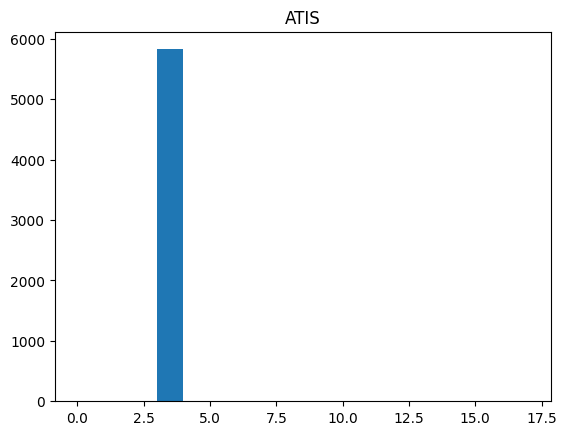

SNIPS success rate tensor(0.9943) mean label pos tensor(0.2151)
mean k tensor(3.6761)
(tensor([3, 4, 5, 6, 7]), tensor([9456, 1777, 2218,  552,  481]))


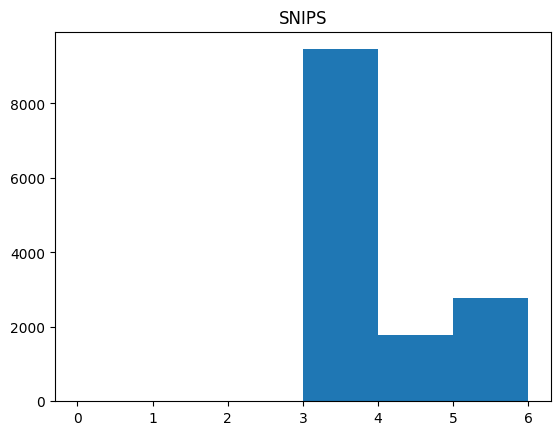

CLINIC150 success rate tensor(0.9620) mean label pos tensor(0.9273)
mean k tensor(7.2599)
(tensor([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  34,
        140, 142, 143, 144, 145, 146, 147, 148, 149, 150]), tensor([13264,  4751,  1736,  1014,   418,   288,   164,   111,    78,    46,
           22,    15,    10,    10,     9,     6,     4,     5,     2,     4,
            4,     3,     2,     2,     1,     1,     2,     1,     2,     1,
            4,     2,     3,     4,    12,    27,    90,   382]))


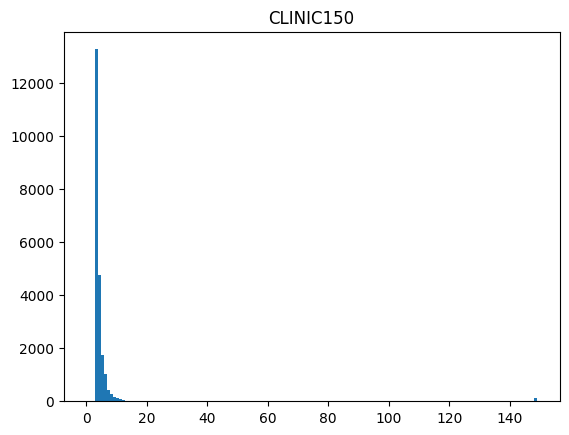

MASSIVE success rate tensor(0.8993) mean label pos tensor(2.5972)
mean k tensor(8.0210)
(tensor([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 41, 42, 43, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]), tensor([7360, 2960, 1775, 1457,  745,  384,  281,  143,  120,   71,   27,   23,
          17,   18,   12,    7,    4,    3,    2,    2,    5,    1,    4,    1,
           1,    1,    1,    2,    1,    2,    1,    2,    1,    2,    1,    2,
           2,    3,    3,    3,    4,    5,    7,   10,   18,   31,   48,   82,
         198,  668]))


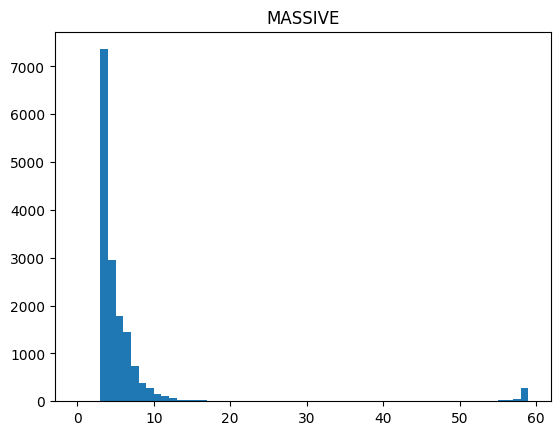

In [ ]:
import json
import torch
import matplotlib.pyplot as plt
from utils import normalise, score, load_data

ROOT_DIR = ''
tasks = ['atis', 'snips', 'clinic150', 'massive']
# encoder_model = 'bge-large-en-v1.5'
encoder_model = 'gte-large'
# setup = 'e+p+om'
setup = 'e'

output_dir = f"{ROOT_DIR}/results/analysis/dynamic_k"
cand_method = 'matmul'

task_top_ks = {}
task_labels = {}
task_label_pos = {}

for task in tasks:
    labels, _, texts, _, intents = load_data(task, 'gemma-2-9b-it', 'gemma-2-9b-it', '8_bit_quant')
    task_labels[task] = labels
    n_intents = len(intents)

    desc_embeds = torch.load(f"{task}-{encoder_model}-descriptions-desc-embeds.pt", weights_only=True)
    desc_sims = normalise(desc_embeds) @ normalise(desc_embeds).T
    sims = torch.load(f"{ROOT_DIR}/sims/{task}-{encoder_model}-sims-{setup}.pt", weights_only=True)
    label_sim = torch.gather(sims, index=labels.unsqueeze(-1), dim=1).flatten()
    preds = torch.argmax(sims, dim=1)

    if task == 'atis':
        sims[:, [6, 8]] = -2
        desc_sims[:, [6, 8]] = -1
        desc_sims[[6, 8], :] = -1

    sims_sorted, sims_sorted_indices = torch.sort(sims, descending=True, dim=1)

    if task == 'atis':
        sims_sorted = sims_sorted[:, :-2]

    # # find pairwise relations in similarity neighbours
    # confusion_pairs = list(zip(sims_sorted_indices[:, :-1], sims_sorted_indices[:, 1:]))
    # confusion_pairs = torch.stack([torch.stack([a, b]) for (a, b) in confusion_pairs], dim=0).reshape(-1, n_intents - 1, 2)
    # # compute average pairwise similarity between neighbours
    # unpacked_indices = confusion_pairs.reshape(-1, 2)
    # pairwise_sims = desc_sims[unpacked_indices[:, 0], unpacked_indices[:, 1]]
    # pairwise_sims = pairwise_sims.reshape(-1, n_intents - 1)
    # pairwise_sims = pairwise_sims[:, list(range(n_intents - 1)) + [-1]] + pairwise_sims[:, [0] + list(range(n_intents - 1))]
    # pairwise_sims /= 2  # shape n_examples * n_intents
    # # modulate sim scores with intra-description confusion
    # corrected_error_sims = sims_sorted * pairwise_sims
    corrected_error_sims = sims * (2 * sims - sims @ torch.softmax(desc_sims, dim=0))
    sorted_corrected_error_sims, i_sorted_corrected_error_sims = torch.sort(corrected_error_sims, descending=True, dim=1)
    deltas1 = torch.diff(sorted_corrected_error_sims, dim=1)
    # deltas1 = torch.diff(sims_sorted, dim=1)
    deltas2 = torch.diff(deltas1, dim=1)
    top_ks = torch.argmax(torch.abs(deltas2), dim=1) + 3  # Adding 3 as second derivative affects 3 entries at a time
    task_top_ks[task] = top_ks

    # # # candidates would be sorted_correct_indices[i, :top_k] for each topk in top_ks and i in n_examples
    # sorted_corrected_indices = torch.gather(sims_sorted_indices, index=i_sorted_corrected_error_sims, dim=-1)

    # intent_pos = torch.argsort(sorted_corrected_indices)
    intent_pos = torch.argsort(sims_sorted_indices, dim=1)
    labels_pos = torch.gather(intent_pos, index=labels.unsqueeze(-1), dim=1).flatten()
    task_label_pos[task] = labels_pos

    print(task.upper(), "success rate", (labels_pos <= top_ks).float().mean(), "mean label pos", labels_pos.float().mean())
    print("mean k", top_ks.float().mean())
    print(torch.unique(top_ks, return_counts=True))

    plt.title(task.upper())
    plt.hist(top_ks, bins=torch.arange(0, n_intents, step=1))
    plt.show()

    # select and save candidates
    outputs = []
    for i, (label, text, top_k) in enumerate(list(zip(labels, texts, top_ks))):
        out = {
            'text': text,
            'intent': intents[label],
        }
        cands = sims_sorted_indices[i, :top_k].tolist()
        cands = [intents[c] for c in cands]
        out['candidates'] = cands
        outputs.append(out)
    with open(f"{output_dir}/{task}-{encoder_model}-{setup}-{cand_method}.json", 'w') as output_file:
        output_file.write(json.dumps(outputs, indent=4))


# error_indices = (labels != preds).nonzero().flatten()
# error_sims = sims[error_indices, :]
# error_labels = labels[error_indices]

# Average metrics for top-k selection

- Using 'confusability'
    - 96.1 k=4 (0.63)
    - 99.5 k=4.9 (0.14)
    - 97.3 k=8.3 (0.65)
    - 92.7 k=8.4 (1.72)
- Using sims only
    - 98.3 k=10.9
    - 99.5 k=4.7
    - 97.5 k=9.8
    - 92.8 k=8.5
- Using matmul desc_sims
    - 96.1, k=4
    - 99.4, k=4.5
    - 97.2, k=6.3
    - 91.9, k=6.7
- Using matmul with n_gram distance
    - 96.1, k=4
    - 99.4, k=4.6
    - 97.2, k=6.2
    - 91.9, k=6.7

In [128]:
error_indices = (labels != preds).nonzero().flatten()
error_labels = labels[error_indices]
error_preds = preds[error_indices]
error_sims = sims[error_indices]

alarm_query alarm_set
what time have you set the alarm


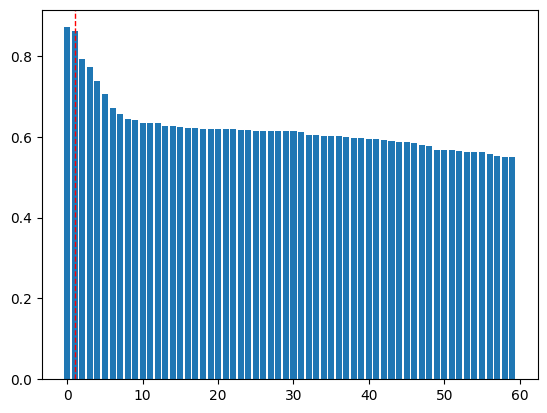

calendar_set recommendation_movies
avinash go with me on fifth april movie commando


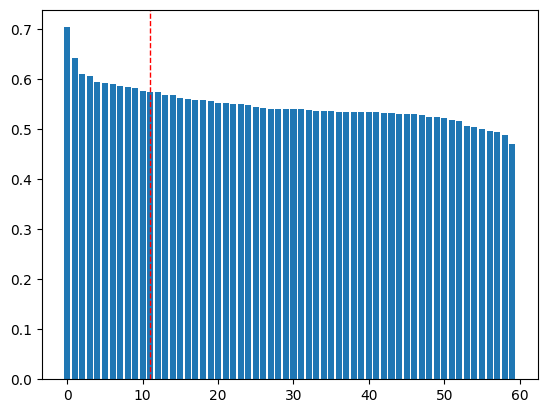

qa_definition iot_hue_lightup
tell me about the solar powered garden stakes


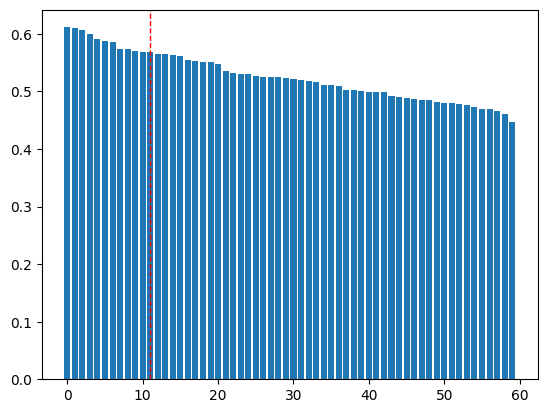

audio_volume_other audio_volume_up
comfortably adjust sound


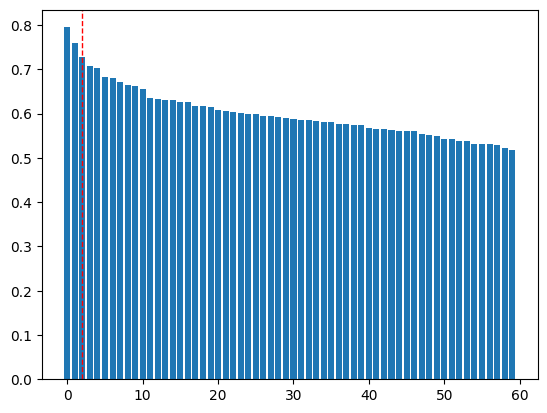

calendar_set recommendation_events
remind me the wedding on time to buy a present


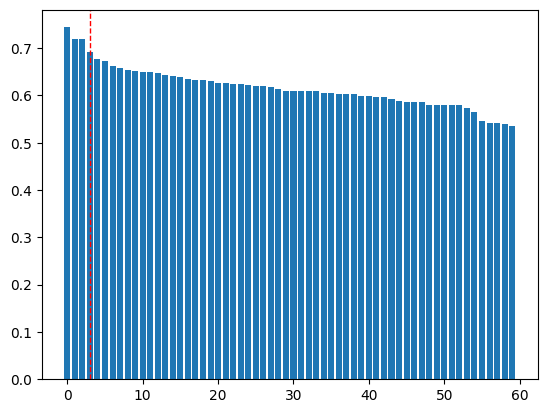

email_sendemail general_greet
reply thank you to john


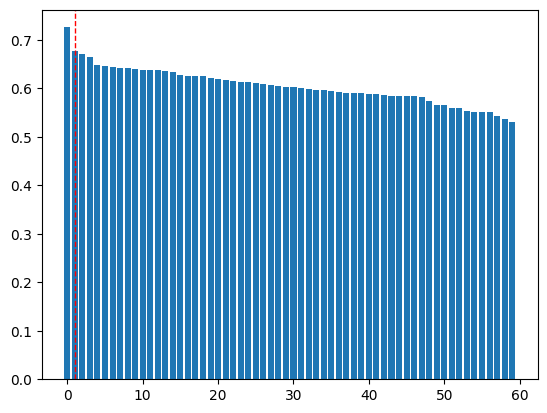

play_music music_likeness
next play summer lovin


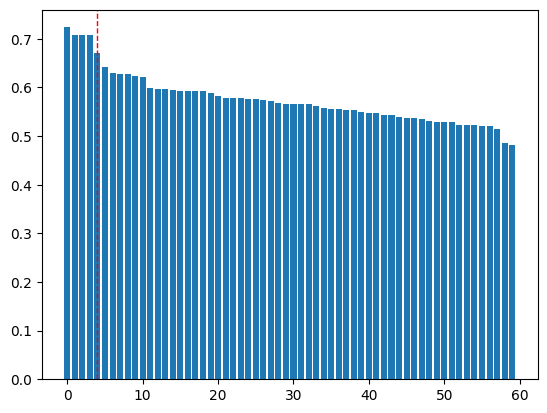

qa_stock qa_currency
current price of google please


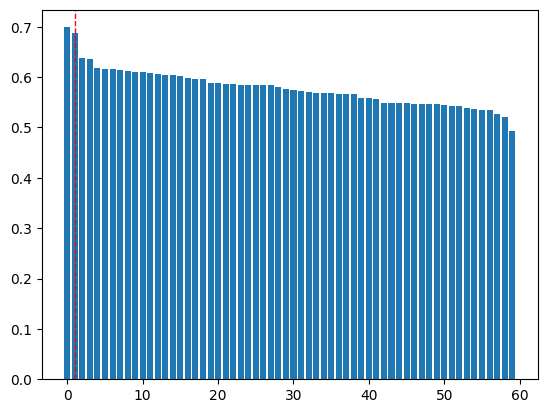

social_post takeaway_query
tweet a customer complaint on the service at the long horn steak house


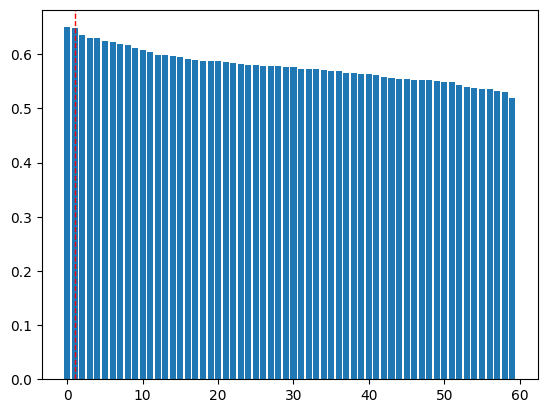

email_sendemail email_query
respond to the mail of ash in morning


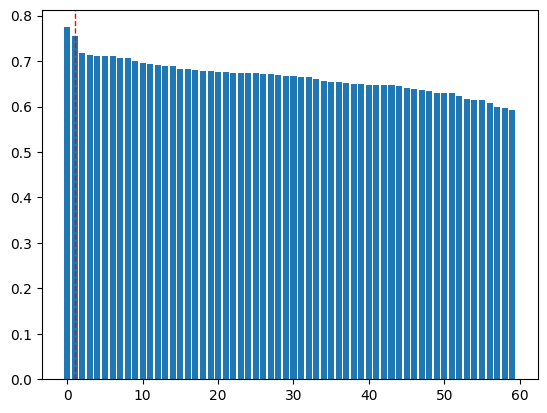

news_query transport_query
what's the latest on the train


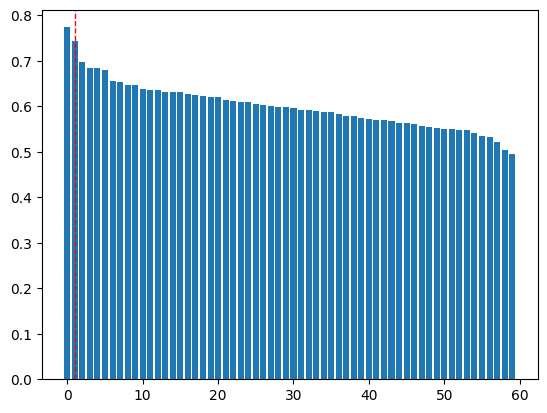

calendar_set iot_hue_lightoff
remind me to turn off the lights in ten minutes


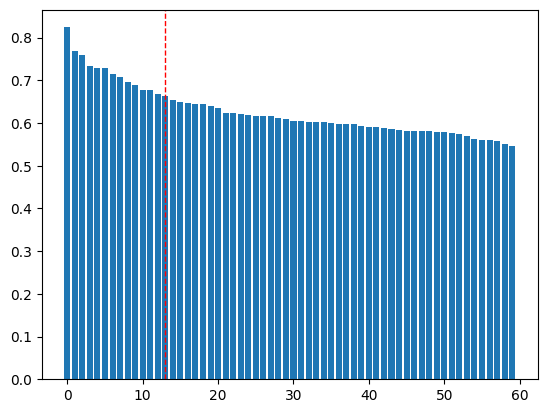

play_music play_podcasts
play titanic title song


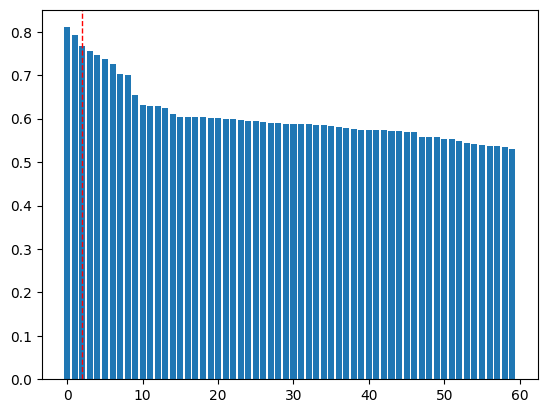

play_music play_podcasts
play giants by banks and steelz


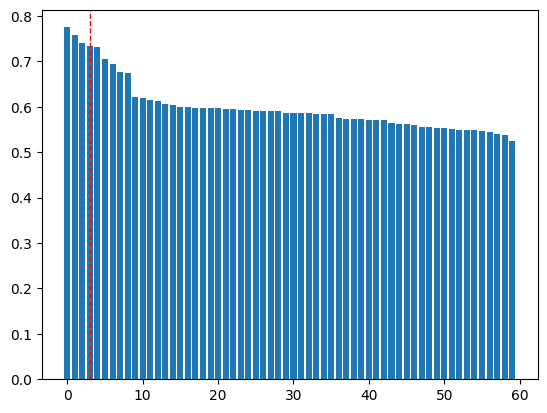

play_music play_podcasts
olly play music from my favorite pianist


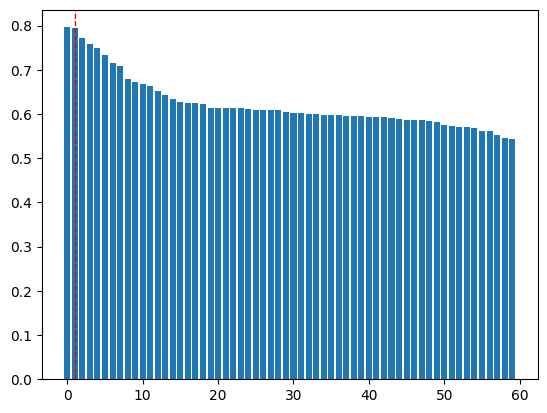

In [129]:
for i in range(15):
    print(intents[error_labels[i]], intents[error_preds[i]])
    print(texts[error_indices[i]])
    sims_dist, error_idx = torch.sort(error_sims[i], dim=-1, descending=True)
    error_pos = torch.argsort(error_idx)
    plt.bar(torch.arange(sims.shape[-1]), sims_dist)
    plt.axvline(error_pos[error_labels[i]], c='red', linestyle='--', linewidth=1)
    plt.show()

weather_query weather_query
is it a good day to go to the beach


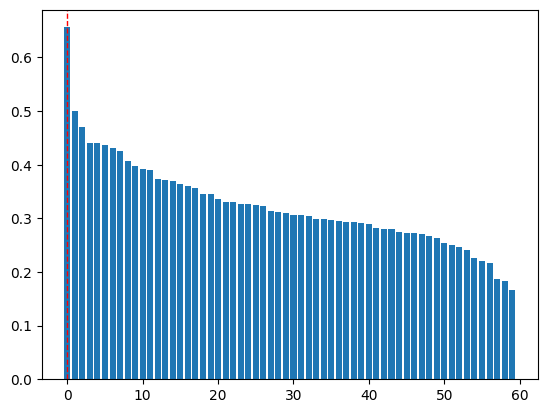

play_audiobook play_audiobook
resume the playback of zanes southeast chronicles


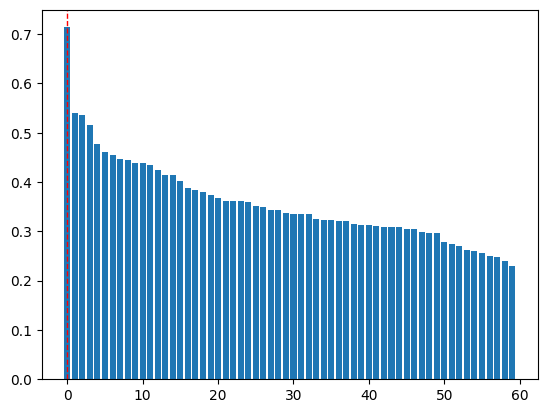

qa_currency qa_currency
what is the euro to dollar exchange rate


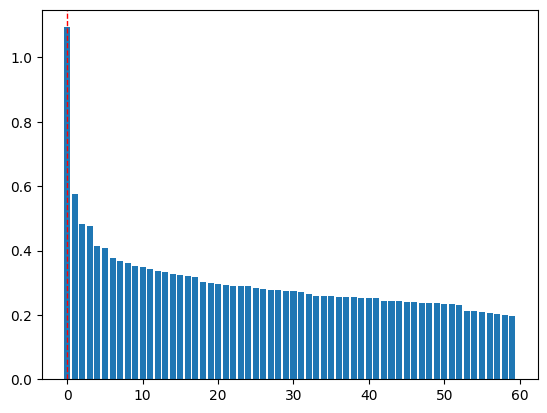

lists_query lists_query
are eggs on my shopping list


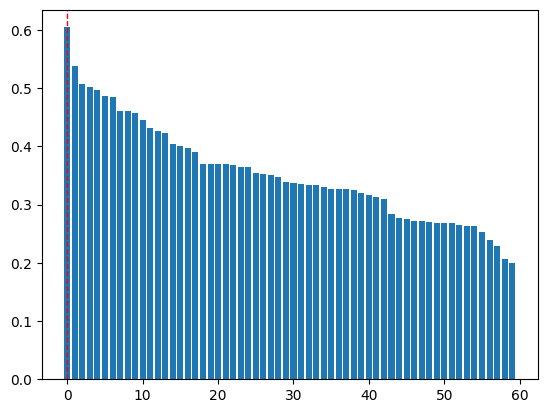

music_query music_query
which song is this


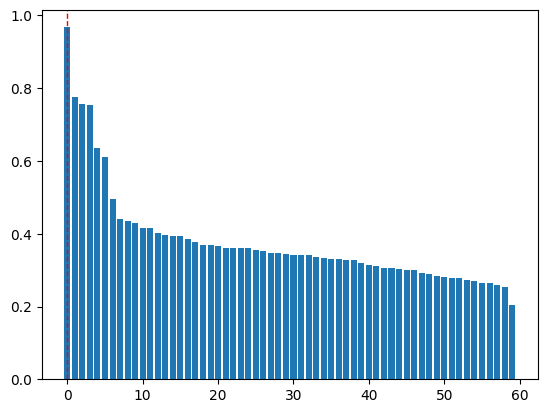

calendar_remove calendar_remove
remove the event from monday


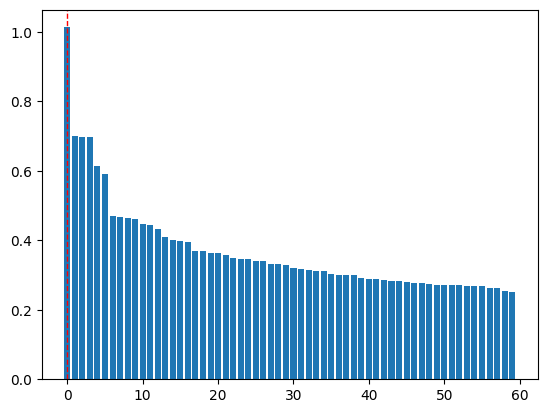

calendar_query calendar_query
what do i have planned for this week


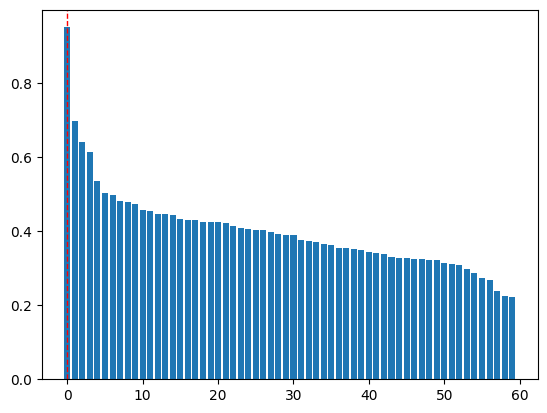

news_query news_query
headlines from b. b. c. world


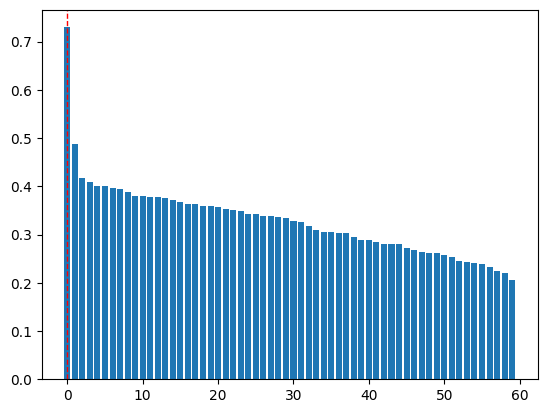

social_query social_query
get me updates from kenny's facebook from the weekend


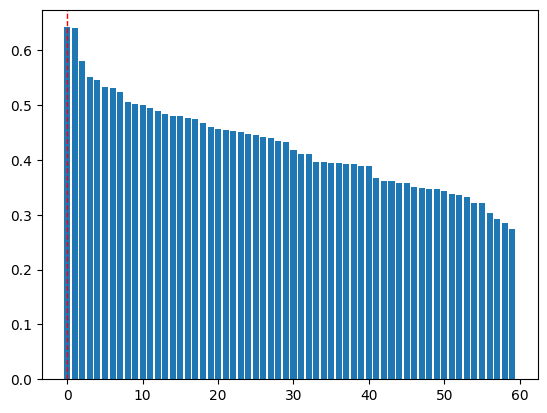

lists_remove lists_remove
please delete this file


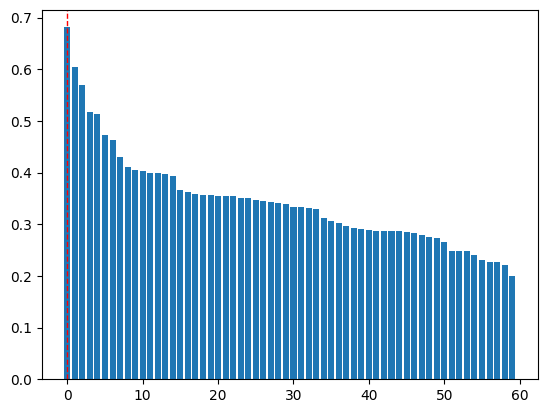

cooking_recipe cooking_recipe
find the recipe for sambar in cookingforu application


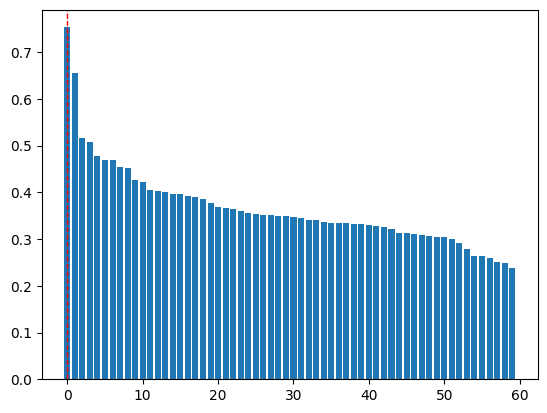

datetime_query datetime_query
what's the date tomorrow


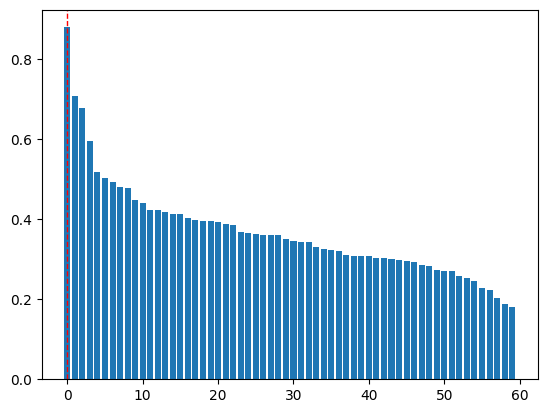

email_sendemail email_sendemail
could you please send an email to my husband


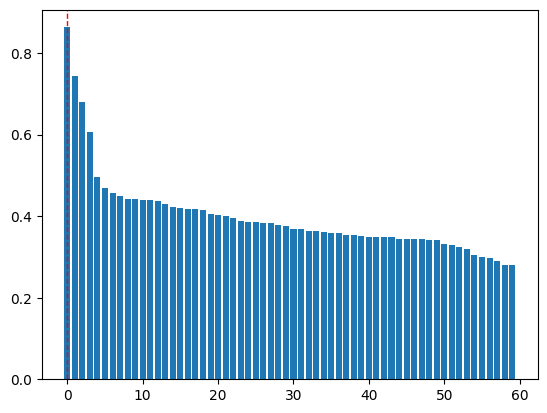

qa_currency qa_currency
find exchange rate for u. s. d. to pound


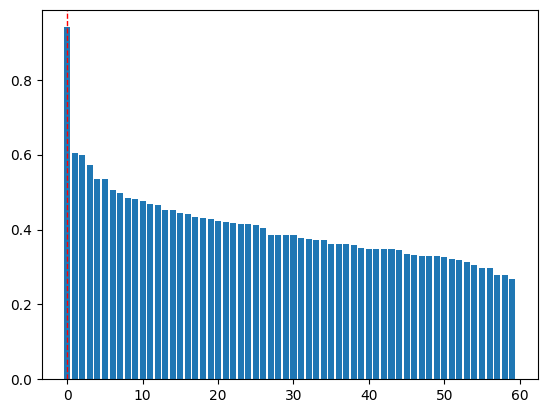

weather_query weather_query
what temperature is it


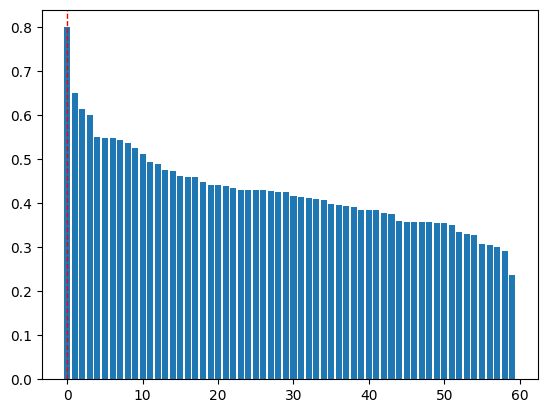

In [107]:
correct_indices = (labels == preds).nonzero().flatten()
correct_preds = preds[correct_indices]
correct_labels = labels[correct_indices]
correct_sims = sims[correct_indices, :]

for i in range(15):
    print(intents[correct_labels[i]], intents[correct_preds[i]])
    print(texts[correct_indices[i]])
    sims_dist, correct_idx = torch.sort(correct_sims[i], dim=-1, descending=True)
    correct_pos = torch.argsort(correct_idx)
    plt.bar(torch.arange(sims.shape[-1]), sims_dist)
    plt.axvline(correct_pos[correct_labels[i]], c='red', linestyle='--', linewidth=1)
    plt.show()